# **TEMA     : KLASIFIKASI KUALITAS LEMON🍋**
---
# **KELOMPOK : 5 A2**
1.   **2009106026 SULHAIRAH** (Data Modelling)
2.   **2009106028 MITHA AMALIA** (Data Collecting & Preprocessing)
3.   **2009106030 PATRICIA CHANDRA** (Visualisasi & Evaluasi)

# **ABOUT DATASET**
---
Lemon dataset telah disiapkan untuk menyelidiki kemungkinan untuk mengatasi masalah kontrol kualitas buah. Ini berisi 2040 gambar (300 x 300 piksel). Gambar lemon diambil pada permukaan beton.

Dataset berisi gambar lemon berkualitas buruk dan baik di bawah kondisi pencahayaan yang sedikit berbeda (semua di bawah sinar matahari).

# **ABOUT PROJECT**
---
Project ini mendeteksi kualitas lemon dalam kategori baik atau buruknya lemon, berdasarkan dataset dan luar dataset.

## **IMPORT LIBRARY**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import os
import cv2
from sklearn import preprocessing
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix

## **DATA COLLECTING**

In [2]:
basePath = r'lemon/'

In [3]:
a = os.listdir(basePath)
class_num = []
for i in a:
  bil = len(os.listdir(basePath+i))
  class_num.append(bil)

print(f"Number of {a[0]} images: {class_num[0]}")
print(f"Number of {a[1]} images: {class_num[1]}")

Number of bad_quality images: 951
Number of good_quality images: 1125


In [4]:
bad_img = cv2.imread('lemon/bad_quality/bad_quality_0.jpg')
good_img = cv2.imread('lemon/good_quality/good_quality_0.jpg')
print('Ukuran dari gambar lemon kualitas jelek : ',bad_img.shape)
print('Ukuran dari gambar lemon kualitas bagus : ',good_img.shape)

Ukuran dari gambar lemon kualitas jelek :  (300, 300, 3)
Ukuran dari gambar lemon kualitas bagus :  (300, 300, 3)


Ukuran gambar : (300, 300, 3)


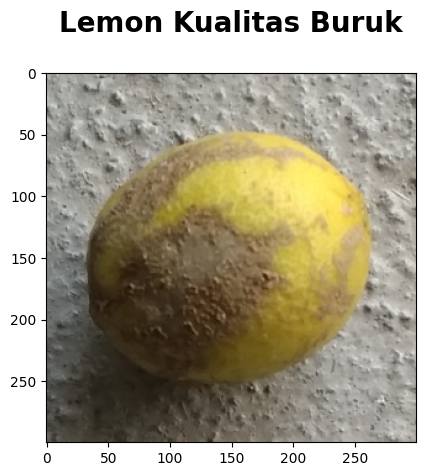

In [5]:
print("Ukuran gambar :",bad_img.shape) 
plt.title("Lemon Kualitas Buruk\n", fontsize=20, fontweight='bold')
plt.imshow(cv2.cvtColor(bad_img,cv2.COLOR_BGR2RGB))
plt.show()

Ukuran gambar : (300, 300, 3)


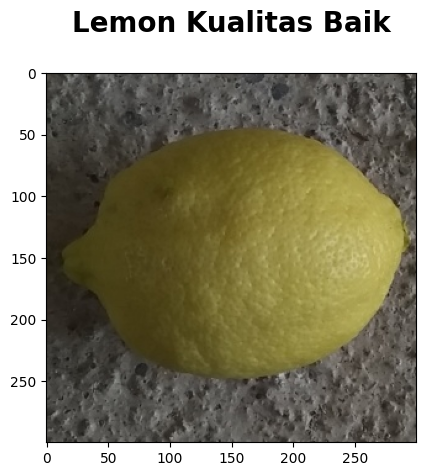

In [6]:
print("Ukuran gambar :",good_img.shape) 
plt.title("Lemon Kualitas Baik\n", fontsize=20, fontweight='bold')
plt.imshow(cv2.cvtColor(good_img,cv2.COLOR_BGR2RGB))
plt.show()

## **DATA PREPROCESSING**

#### **SPLIT FOLDER**

In [7]:
# !pip install split-folders

In [8]:
# import splitfolders

In [9]:
# splitfolders.ratio(
#     basePath,
#     output='Data',
#     ratio=(.7,.20,.10) #train 70%, validasi 20%, test 10%
# ) 

In [10]:
from keras_preprocessing.image import ImageDataGenerator
TRAINING_DIR = "Data/train"
TEST_DIR = "Data/test"
VAL_DIR = "Data/val"

training_datagen = ImageDataGenerator(
    rescale = 1./255, #untuk scalling itu mempercepat training
    horizontal_flip = True, #diputar scr horizontal 180 derajat
    rotation_range = 40, #diputar 40 derajat
    brightness_range = (0.5,1.5), #agar bisa prediksi data yg redup atau terang nantinya
    zoom_range = 0.2, #di perbesar 20%
    fill_mode = 'nearest', #mengikuti warna sekitar
)

test = ImageDataGenerator(
    rescale = 1./255)

print('Traning Generator: ', end="")
train_generator = training_datagen.flow_from_directory(
    #merubah ke dimensi 150,150
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')

print('Validation Generator: ', end="")
validation_generator = test.flow_from_directory(
    VAL_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')


print('Test Generator: ', end="")
test_generator = test.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')

Traning Generator: Found 1452 images belonging to 2 classes.
Validation Generator: Found 415 images belonging to 2 classes.
Test Generator: Found 314 images belonging to 2 classes.
